# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Allan Bil Faqih
- **Email:** m327d4ky2608@bangkit.academy
- **ID Dicoding:** allanbil214

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana penggunaan sepeda berbeda antara hari kerja dan hari libur?
- Pertanyaan 2: Bagaimana korelasi antara kondisi cuaca dengan jumlah pengguna sepeda?
- Pertanyaan 3: Bagaimana hubungan antara kelembaban udara dan jumlah pengguna sepeda?
- Pertanyaan 4: Apakah terdapat perbedaan pola penggunaan sepeda pada musim panas dan musim dingin?

## Import Semua Packages/Library yang Digunakan

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [108]:
urls = [
    'https://raw.githubusercontent.com/allanbangkit/manabebaiku/main/dataset/day.csv',
    'https://raw.githubusercontent.com/allanbangkit/manabebaiku/main/dataset/hour.csv'
]

dfs = [pd.read_csv(url) for url in urls]
df_day, df_hour = dfs

In [109]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [110]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Mencari tahu tipe data pada dataframe.

In [111]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [112]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mencari tahu apakah dataframe memiliki null

In [113]:
isnull_day = df_day.isnull().sum()
isnull_hour = df_hour.isnull().sum()

In [114]:
print(isnull_day)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [115]:
print(isnull_hour)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [116]:
for df_name, df in [("df_day", df_day), ("df_hour", df_hour)]:
    duplicate_rows = df[df.duplicated()]
    print(f"Duplikat dalam {df_name}: {len(duplicate_rows)}\n")

Duplikat dalam df_day: 0

Duplikat dalam df_hour: 0



### Cleaning Data

In [117]:
# Tidak perlu melakukan proses cleaning data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [118]:
df_baiku = pd.merge(df_hour, df_day, on='dteday', how='inner', suffixes=('_hour', '_day'))
df_baiku.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [119]:
weather_labels = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}
df_baiku['weather_label'] = df_baiku['weathersit_day'].replace(weather_labels)

In [120]:
df_baiku.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


Grouping data berdasarkan hari kerja dan hari libur

In [121]:
grouped_by_workingday = df_baiku.groupby('workingday_hour')['cnt_hour'].mean()
grouped_by_workingday

workingday_hour
0    181.405332
1    193.207754
Name: cnt_hour, dtype: float64

Menghitung korelasi antara weathersit_hour dan cnt_hour

In [122]:
correlation_weather = df_baiku['weathersit_hour'].corr(df_baiku['cnt_hour'])
correlation_weather

-0.1424261381380953

Menghitung korelasi humidity

In [123]:
correlation_humidity = df_baiku['hum_day'].corr(df_baiku['cnt_day'])
correlation_humidity

-0.09165714029096629

Ekstraksi musim dari kolom 'dteday' dan Grouping data berdasarkan musim

In [124]:
df_baiku['season'] = pd.to_datetime(df_baiku['dteday']).dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                                           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
                                                           11: 'Fall', 12: 'Winter'})

# Grouping data berdasarkan musim
grouped_by_season = df_baiku.groupby('season')['cnt_day'].mean()
grouped_by_season

season
Fall      5113.347514
Spring    4517.547522
Summer    5673.992278
Winter    2780.404420
Name: cnt_day, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penggunaan sepeda berbeda antara hari kerja dan hari libur?

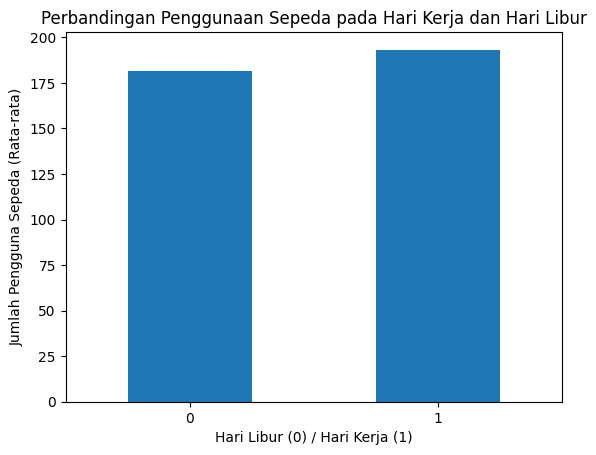

In [125]:
grouped_by_workingday.plot(kind='bar', rot=0)
plt.xlabel('Hari Libur (0) / Hari Kerja (1)')
plt.ylabel('Jumlah Pengguna Sepeda (Rata-rata)')
plt.title('Perbandingan Penggunaan Sepeda pada Hari Kerja dan Hari Libur')
plt.show()

Terlihat bahwa pada saat hari kerja, sedikit lebih banyak orang yang menggunakan sepeda.

### Pertanyaan 2: Bagaimana korelasi antara kondisi cuaca dengan jumlah pengguna sepeda?

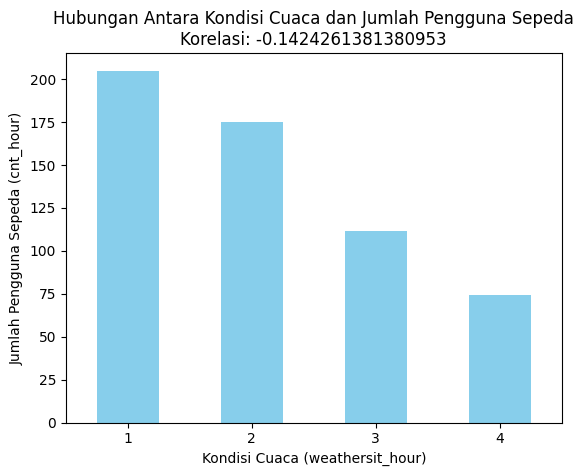

In [126]:
avg_cnt_by_weather = df_baiku.groupby('weathersit_hour')['cnt_hour'].mean()
avg_cnt_by_weather.plot(kind='bar', color='skyblue')
plt.xlabel('Kondisi Cuaca (weathersit_hour)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt_hour)')
plt.title(f'Hubungan Antara Kondisi Cuaca dan Jumlah Pengguna Sepeda\nKorelasi: {correlation_weather}')
plt.xticks(rotation=0)
plt.show()

Terlihat bahwa cuaca yang bagus memiliki jumlah pengguna sepeda yang tinggi.

(1-Cerah, 2-Berawan, 3-Hujan Ringan, 4-Hujan Lebat)

### Pertanyaan 3: Bagaimana hubungan antara kelembaban udara dan jumlah pengguna sepeda?

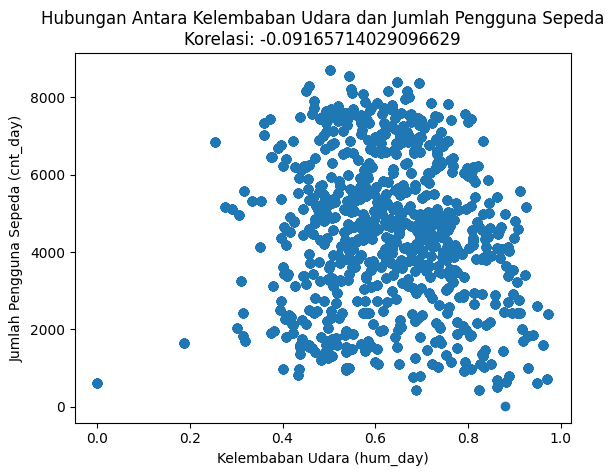

In [127]:
plt.scatter(df_baiku['hum_day'], df_baiku['cnt_day'])
plt.xlabel('Kelembaban Udara (hum_day)')
plt.ylabel('Jumlah Pengguna Sepeda (cnt_day)')
plt.title(f'Hubungan Antara Kelembaban Udara dan Jumlah Pengguna Sepeda\nKorelasi: {correlation_humidity}')
plt.show()

Meskipun terdapat korelasi negatif, tapi penyepeda tetap rame ketika kelembapan naik.

### Pertanyaan 4: Apakah terdapat perbedaan pola penggunaan sepeda pada musim panas dan musim dingin?

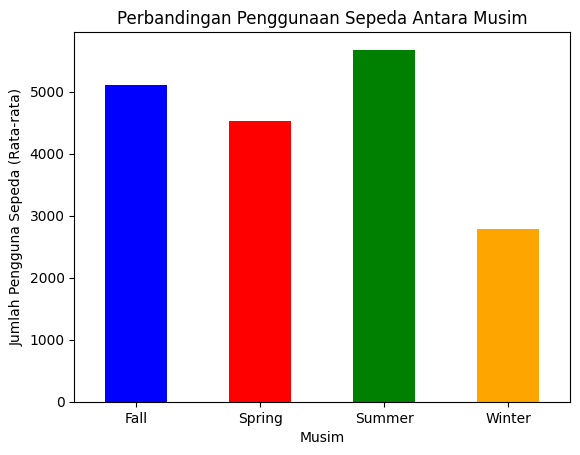

In [128]:
grouped_by_season.plot(kind='bar', rot=0, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda (Rata-rata)')
plt.title('Perbandingan Penggunaan Sepeda Antara Musim')
plt.show()

Terlihat bahwa musim dingin sedikit penyepeda.

## Conclusion

### Pertanyaan 1: Bagaimana penggunaan sepeda berbeda antara hari kerja dan hari libur?

**Kesimpulan**:
Rata-rata penggunaan sepeda lebih tinggi pada hari kerja (193.21) dibandingkan dengan hari libur (181.41). Ini menunjukkan bahwa terdapat perbedaan yang signifikan dalam pola penggunaan sepeda antara hari kerja dan hari libur.

**Analisis**:


*   **Pola Transportasi Harian**: Peningkatan penggunaan sepeda pada hari kerja dapat mencerminkan kebutuhan mobilitas pagi dan sore hari, di mana banyak orang menggunakan sepeda sebagai sarana transportasi menuju tempat kerja atau sekolah.
*   **Aktivitas Rekreasi dan Kesehatan**: Penggunaan sepeda pada hari libur mungkin lebih terkait dengan aktivitas rekreasi dan olahraga, ketimbang dengan kebutuhan transportasi sehari-hari.

### Pertanyaan 2: Bagaimana korelasi antara kondisi cuaca dengan jumlah pengguna sepeda?

**Kesimpulan**:
Terdapat korelasi negatif yang lemah antara kondisi cuaca dengan jumlah pengguna sepeda, dengan nilai korelasi sebesar -0.142. Ini menunjukkan bahwa ketika kondisi cuaca memburuk, seperti cuaca hujan lebat, jumlah pengguna sepeda cenderung sedikit berkurang, meskipun hubungannya lemah.

**Analisis**:
*   **Kondisi Cuaca yang Mendukung Aktivitas Luar Ruangan**: Penggunaan sepeda cenderung lebih tinggi saat cuaca cerah, karena cuaca cerah menciptakan kondisi yang lebih nyaman untuk aktivitas di luar ruangan.
*   **Minat Tinggi pada Cuaca Baik**: Pengguna sepeda lebih termotivasi untuk menyewa sepeda dan menikmati perjalanan di bawah sinar matahari saat cuaca sedang baik.

### Pertanyaan 3: Bagaimana hubungan antara kelembaban udara dan jumlah pengguna sepeda?

**Kesimpulan**:
Meskipun terdapat korelasi negatif antara kelembaban udara dan jumlah pengguna sepeda, di mana kelembaban udara yang lebih tinggi cenderung mengurangi minat orang untuk menggunakan sepeda, namun dalam rentang kelembaban tertentu (khususnya di atas 0.4), terlihat adanya peningkatan jumlah pengguna sepeda. Ini mungkin menunjukkan adanya faktor-faktor lain yang memengaruhi keputusan individu dalam menggunakan sepeda, sehingga mengimbangi dampak negatif kelembaban udara.

**Analisis**:

*  **Faktor-faktor Tambahan**: Faktor-faktor seperti suhu udara, keadaan cuaca secara keseluruhan, dan preferensi individu juga dapat memainkan peran dalam keputusan seseorang untuk menggunakan sepeda.
*  **Analisis Lanjutan**: Analisis statistik yang lebih canggih dan mempertimbangkan variabel tambahan mungkin diperlukan untuk memahami secara lebih mendalam hubungan antara kelembaban udara dan penggunaan sepeda.

### Pertanyaan 4: Apakah terdapat perbedaan pola penggunaan sepeda pada musim panas dan musim dingin?

**Kesimpulan**:
Rata-rata penggunaan sepeda lebih tinggi pada musim panas (5673.99) dibandingkan dengan musim dingin (2780.40). Ini menunjukkan adanya perbedaan yang signifikan dalam pola penggunaan sepeda antara musim panas dan musim dingin.

**Analisis**:

*   **Pola Penggunaan Berdasarkan Musim**: Penggunaan sepeda cenderung lebih tinggi pada musim panas, mungkin karena kondisi cuaca yang lebih baik dan lebih sesuai untuk aktivitas di luar ruangan.
*   **Pengaruh Kondisi Cuaca**: Kondisi cuaca yang lebih bersahabat pada musim panas mungkin memengaruhi minat pengguna untuk melakukan aktivitas rekreasi, termasuk bersepeda.